## 1. Setup and Data Loading

In [1]:
# Import required libraries
import sys
from pathlib import Path

# Add parent directory to path for imports
sys.path.insert(0, str(Path.cwd().parent))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Import core modules
from core.config import Config
from core.preprocessor import ReviewPreprocessor

# Configuration
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Set figure size defaults
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ Libraries imported successfully")
print(f"Working directory: {Path.cwd()}")

✓ Libraries imported successfully
Working directory: /home/voldi/Projects/ai-ml/fintech-app-review-analysis/notebooks


In [2]:
# Initialize configuration
config = Config()

print("Configuration Details:")
print(f"Banks: {', '.join(config.get_all_banks())}")
print(f"Data Directory: {config.PROCESSED_DATA_DIR}")
print(f"Scraping Parameters: {config.SCRAPING_PARAMS}")

Configuration Details:
Banks: CBE, BOA, Dashen
Data Directory: /home/voldi/Projects/ai-ml/fintech-app-review-analysis/data/processed
Scraping Parameters: {'language': 'en', 'country': 'et', 'count': 500, 'sort_by': 1, 'filter_score_with': None}


In [3]:
# Load cleaned data
data_path = config.PROCESSED_DATA_DIR / "cleaned_reviews.csv"

if not data_path.exists():
    print("❌ Cleaned data not found. Running preprocessor...")
    preprocessor = ReviewPreprocessor(config)
    df_raw = preprocessor.load_raw_data()
    df = preprocessor.clean_data(df_raw)
    preprocessor.save_cleaned_data(df)
    print("✓ Data preprocessed and saved")
else:
    df = pd.read_csv(data_path)
    print("✓ Cleaned data loaded successfully")

print(f"\nDataset shape: {df.shape}")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")

✓ Cleaned data loaded successfully

Dataset shape: (1356, 5)
Date range: 2024-05-01 to 2025-11-26


## 2. Dataset Overview

In [4]:
# Display basic information
print("=" * 70)
print("DATASET OVERVIEW")
print("=" * 70)

print(f"\nTotal Reviews: {len(df):,}")
print(f"Columns: {df.shape[1]}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n" + "-" * 70)
print("COLUMN DETAILS")
print("-" * 70)
df.info()

DATASET OVERVIEW

Total Reviews: 1,356
Columns: 5
Memory Usage: 0.51 MB

----------------------------------------------------------------------
COLUMN DETAILS
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  1356 non-null   object
 1   rating  1356 non-null   int64 
 2   date    1356 non-null   object
 3   bank    1356 non-null   object
 4   source  1356 non-null   object
dtypes: int64(1), object(4)
memory usage: 53.1+ KB


In [5]:
# Display first few rows
print("Sample Reviews:")
df.head()

Sample Reviews:


,review,rating,date,bank,source
0,most of the time is not working properly,1,2025-11-25,Bank of Abyssinia,Google Play
1,It keeps notifying me to disable developer opt...,1,2025-11-22,Bank of Abyssinia,Google Play
2,the lag is unbelievable when you need it the m...,1,2025-11-19,Bank of Abyssinia,Google Play
3,I cant belive I could find the worst bank app ...,1,2025-11-18,Bank of Abyssinia,Google Play
4,it is a good app,5,2025-11-18,Bank of Abyssinia,Google Play


In [6]:
# Statistical summary
print("Statistical Summary:")
df.describe(include='all')

Statistical Summary:


,review,rating,date,bank,source
count,1356,1356.000000,1356,1356,1356
unique,1303,NaN,445,3,1
top,good app,NaN,2025-04-21,Dashen Bank,Google Play
freq,17,NaN,96,489,1356
mean,NaN,3.404130,NaN,NaN,NaN
std,NaN,1.800479,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN
50%,NaN,5.000000,NaN,NaN,NaN
75%,NaN,5.000000,NaN,NaN,NaN


## 3. Distribution Analysis by Bank

Reviews per Bank:
  Dashen Bank: 489 (36.1%)
  Bank of Abyssinia: 480 (35.4%)
  Commercial Bank of Ethiopia: 387 (28.5%)


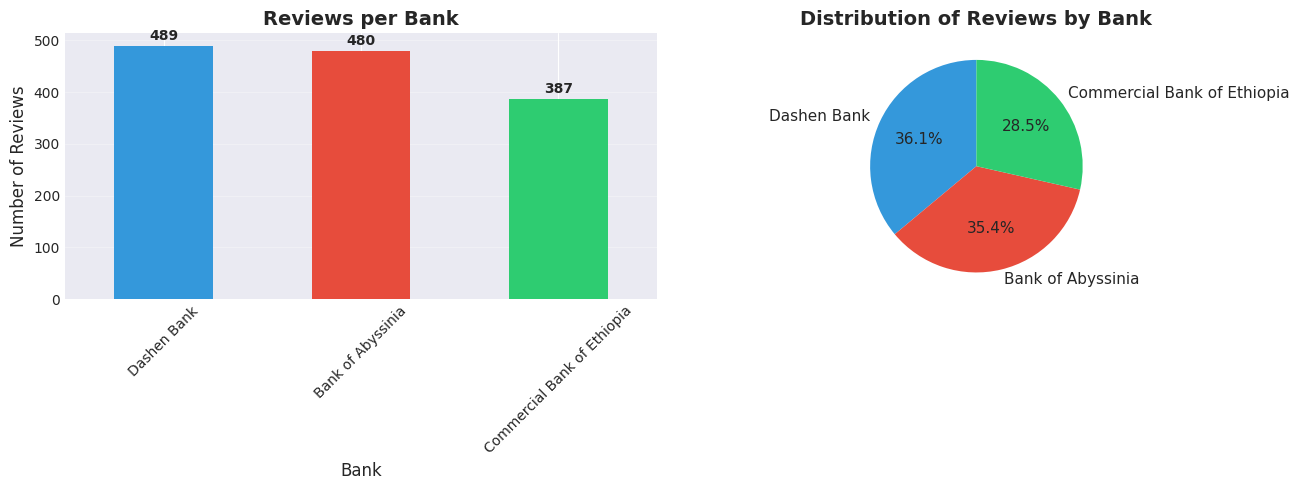

In [8]:
# Reviews per bank
bank_counts = df['bank'].value_counts()

print("Reviews per Bank:")
for bank, count in bank_counts.items():
    pct = (count / len(df) * 100)
    print(f"  {bank}: {count:,} ({pct:.1f}%)")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
bank_counts.plot(kind='bar', ax=axes[0], color=['#3498db', '#e74c3c', '#2ecc71'])
axes[0].set_title('Reviews per Bank', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Bank', fontsize=12)
axes[0].set_ylabel('Number of Reviews', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(bank_counts.values):
    axes[0].text(i, v + 5, str(v), ha='center', va='bottom', fontweight='bold')

# Pie chart
colors = ['#3498db', '#e74c3c', '#2ecc71']
axes[1].pie(bank_counts.values, labels=bank_counts.index, autopct='%1.1f%%',
            startangle=90, colors=colors, textprops={'fontsize': 11})
axes[1].set_title('Distribution of Reviews by Bank', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 4. Rating Distribution Analysis

In [9]:
# Overall rating statistics
print("=" * 70)
print("RATING STATISTICS")
print("=" * 70)

print(f"\nAverage Rating: {df['rating'].mean():.2f}")
print(f"Median Rating: {df['rating'].median():.1f}")
print(f"Mode Rating: {df['rating'].mode()[0]:.0f}")
print(f"Standard Deviation: {df['rating'].std():.2f}")

print("\nRating Distribution:")
rating_dist = df['rating'].value_counts().sort_index()
for rating, count in rating_dist.items():
    pct = (count / len(df) * 100)
    stars = '⭐' * int(rating)
    bar = '█' * int(pct / 2)
    print(f"  {stars} ({rating}): {count:3d} ({pct:5.1f}%) {bar}")

RATING STATISTICS

Average Rating: 3.40
Median Rating: 5.0
Mode Rating: 5
Standard Deviation: 1.80

Rating Distribution:
  ⭐ (1): 423 ( 31.2%) ███████████████
  ⭐⭐ (2):  75 (  5.5%) ██
  ⭐⭐⭐ (3):  78 (  5.8%) ██
  ⭐⭐⭐⭐ (4):  91 (  6.7%) ███
  ⭐⭐⭐⭐⭐ (5): 689 ( 50.8%) █████████████████████████


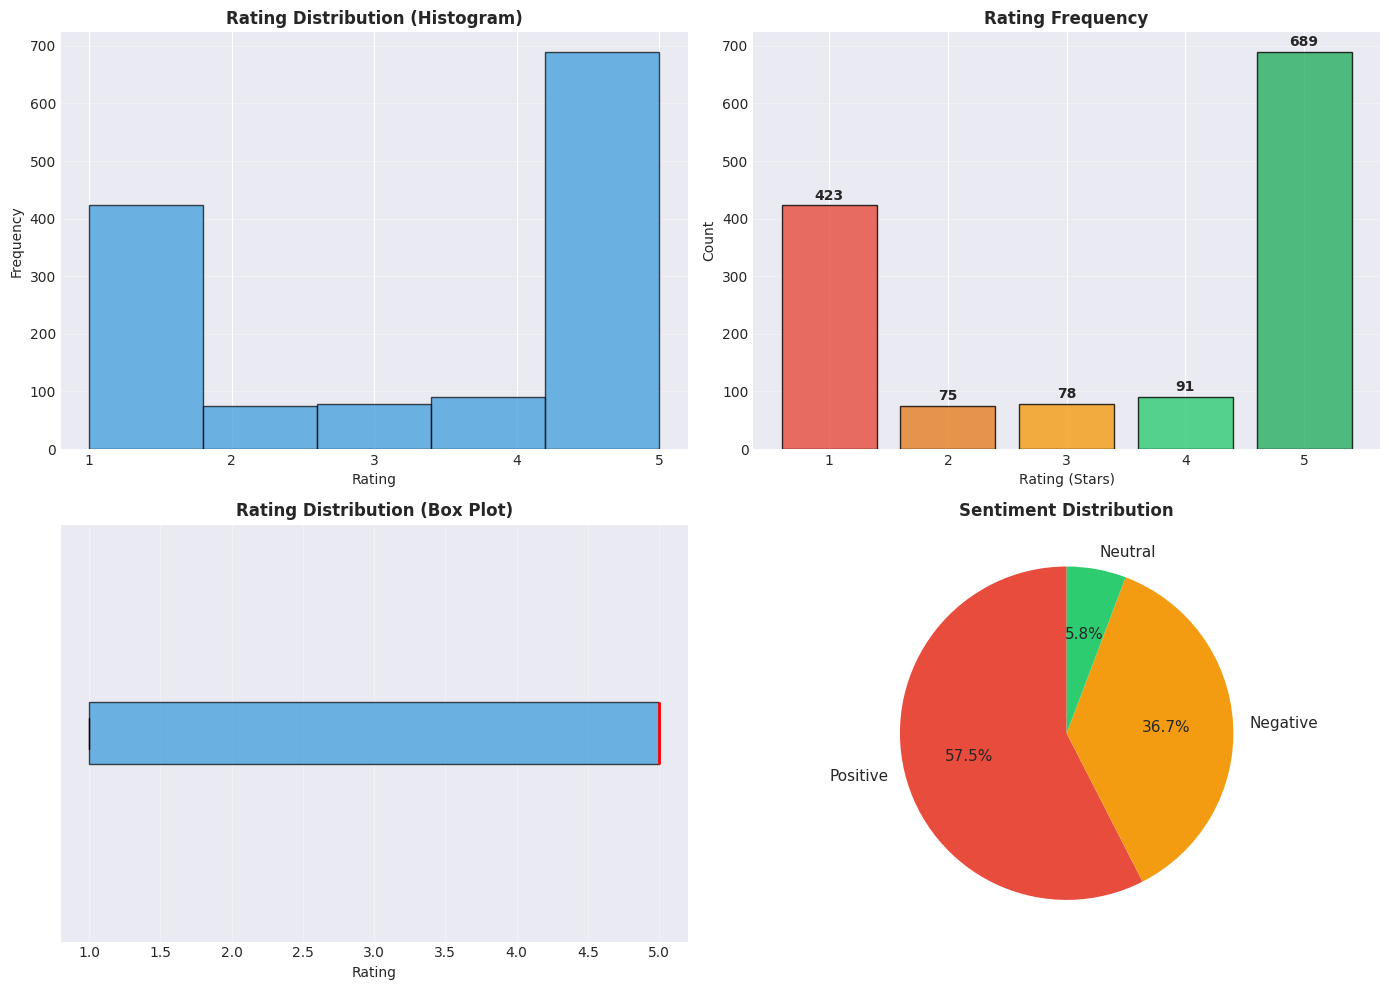


Sentiment Categories:
  Positive: 780 (57.5%)
  Negative: 498 (36.7%)
  Neutral: 78 (5.8%)


In [10]:
# Overall rating distribution visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Histogram
axes[0, 0].hist(df['rating'], bins=5, edgecolor='black', alpha=0.7, color='#3498db')
axes[0, 0].set_title('Rating Distribution (Histogram)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Rating')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_xticks([1, 2, 3, 4, 5])
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Count plot
rating_counts = df['rating'].value_counts().sort_index()
axes[0, 1].bar(rating_counts.index, rating_counts.values, 
               color=['#e74c3c', '#e67e22', '#f39c12', '#2ecc71', '#27ae60'],
               edgecolor='black', alpha=0.8)
axes[0, 1].set_title('Rating Frequency', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Rating (Stars)')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_xticks([1, 2, 3, 4, 5])
axes[0, 1].grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(rating_counts.values):
    axes[0, 1].text(rating_counts.index[i], v + 5, str(v), 
                    ha='center', va='bottom', fontweight='bold')

# 3. Box plot
axes[1, 0].boxplot([df['rating']], vert=False, patch_artist=True,
                    boxprops=dict(facecolor='#3498db', alpha=0.7),
                    medianprops=dict(color='red', linewidth=2))
axes[1, 0].set_title('Rating Distribution (Box Plot)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Rating')
axes[1, 0].set_yticks([])
axes[1, 0].grid(axis='x', alpha=0.3)

# 4. Sentiment categorization
df['sentiment_category'] = pd.cut(df['rating'], 
                                   bins=[0, 2, 3, 5], 
                                   labels=['Negative', 'Neutral', 'Positive'])
sentiment_counts = df['sentiment_category'].value_counts()
colors_sent = ['#e74c3c', '#f39c12', '#2ecc71']
axes[1, 1].pie(sentiment_counts.values, labels=sentiment_counts.index,
               autopct='%1.1f%%', startangle=90, colors=colors_sent,
               textprops={'fontsize': 11})
axes[1, 1].set_title('Sentiment Distribution', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nSentiment Categories:")
for cat, count in sentiment_counts.items():
    pct = (count / len(df) * 100)
    print(f"  {cat}: {count:,} ({pct:.1f}%)")

## 5. Rating Analysis by Bank

In [11]:
# Rating statistics by bank
print("=" * 70)
print("RATING STATISTICS BY BANK")
print("=" * 70)

bank_stats = df.groupby('bank')['rating'].agg([
    ('Count', 'count'),
    ('Mean', 'mean'),
    ('Median', 'median'),
    ('Std Dev', 'std'),
    ('Min', 'min'),
    ('Max', 'max')
]).round(2)

print("\n", bank_stats)

# Rating distribution by bank
print("\n" + "-" * 70)
print("RATING DISTRIBUTION BY BANK")
print("-" * 70)
rating_by_bank = pd.crosstab(df['bank'], df['rating'], normalize='index') * 100
print("\n", rating_by_bank.round(1))

RATING STATISTICS BY BANK

                              Count  Mean  Median  Std Dev  Min  Max
bank                                                               
Bank of Abyssinia              480  2.41     1.0     1.76    1    5
Commercial Bank of Ethiopia    387  3.79     5.0     1.60    1    5
Dashen Bank                    489  4.08     5.0     1.54    1    5

----------------------------------------------------------------------
RATING DISTRIBUTION BY BANK
----------------------------------------------------------------------

 rating                          1    2    3     4     5
bank                                                   
Bank of Abyssinia            56.5  5.6  6.5   3.8  27.7
Commercial Bank of Ethiopia  19.4  5.7  6.7  13.2  55.0
Dashen Bank                  15.7  5.3  4.3   4.5  70.1


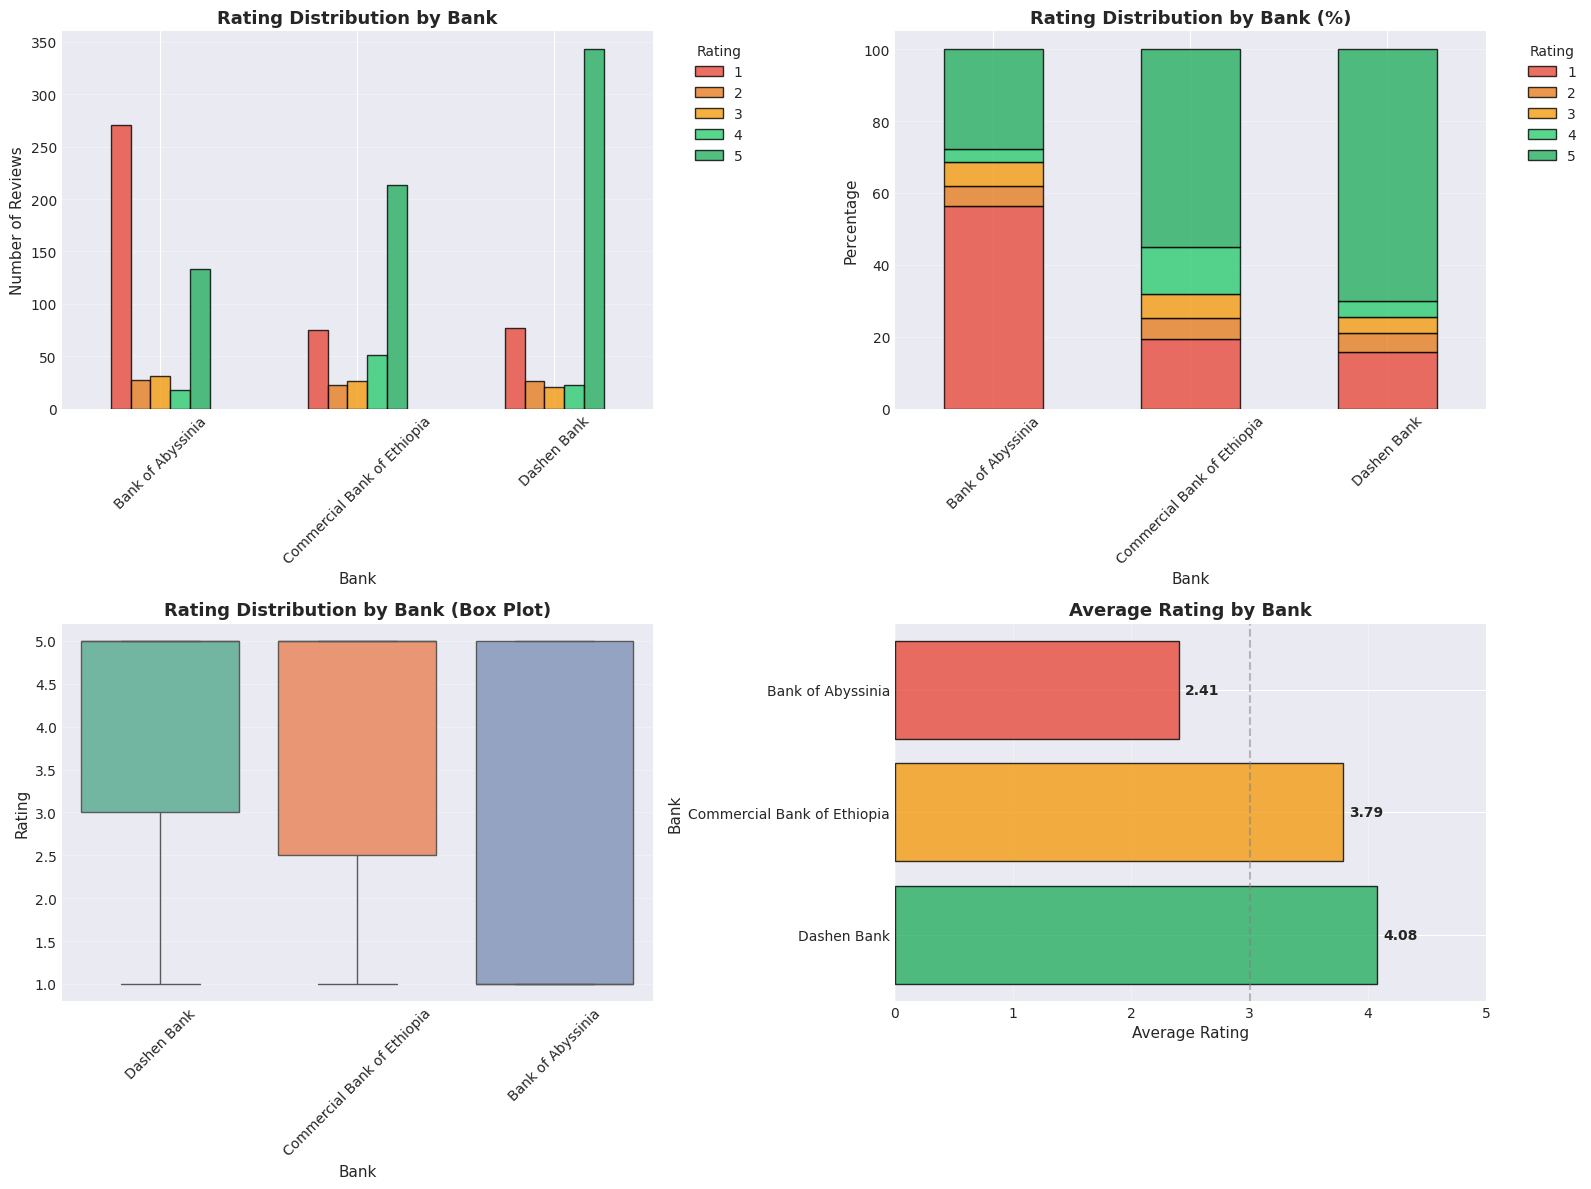

In [12]:
# Visualize rating distribution by bank
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Grouped bar chart
rating_by_bank_counts = pd.crosstab(df['bank'], df['rating'])
rating_by_bank_counts.plot(kind='bar', ax=axes[0, 0], 
                           color=['#e74c3c', '#e67e22', '#f39c12', '#2ecc71', '#27ae60'],
                           edgecolor='black', alpha=0.8)
axes[0, 0].set_title('Rating Distribution by Bank', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Bank', fontsize=11)
axes[0, 0].set_ylabel('Number of Reviews', fontsize=11)
axes[0, 0].legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Stacked bar chart (percentages)
rating_by_bank.plot(kind='bar', stacked=True, ax=axes[0, 1],
                    color=['#e74c3c', '#e67e22', '#f39c12', '#2ecc71', '#27ae60'],
                    edgecolor='black', alpha=0.8)
axes[0, 1].set_title('Rating Distribution by Bank (%)', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Bank', fontsize=11)
axes[0, 1].set_ylabel('Percentage', fontsize=11)
axes[0, 1].legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Box plot by bank
bank_order = df.groupby('bank')['rating'].mean().sort_values(ascending=False).index
sns.boxplot(data=df, x='bank', y='rating', ax=axes[1, 0], order=bank_order,
            palette='Set2')
axes[1, 0].set_title('Rating Distribution by Bank (Box Plot)', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Bank', fontsize=11)
axes[1, 0].set_ylabel('Rating', fontsize=11)
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Average rating comparison
avg_ratings = df.groupby('bank')['rating'].mean().sort_values(ascending=False)
colors_avg = ['#27ae60' if x >= 4 else '#f39c12' if x >= 3 else '#e74c3c' 
              for x in avg_ratings.values]
axes[1, 1].barh(avg_ratings.index, avg_ratings.values, color=colors_avg,
                edgecolor='black', alpha=0.8)
axes[1, 1].set_title('Average Rating by Bank', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('Average Rating', fontsize=11)
axes[1, 1].set_ylabel('Bank', fontsize=11)
axes[1, 1].set_xlim(0, 5)
axes[1, 1].axvline(x=3, color='gray', linestyle='--', alpha=0.5, label='Neutral (3.0)')
axes[1, 1].grid(axis='x', alpha=0.3)

# Add value labels
for i, (bank, rating) in enumerate(avg_ratings.items()):
    axes[1, 1].text(rating + 0.05, i, f'{rating:.2f}', 
                    va='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

## 6. Temporal Analysis

In [13]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['year_month'] = df['date'].dt.to_period('M')

# Temporal statistics
print("=" * 70)
print("TEMPORAL ANALYSIS")
print("=" * 70)

print(f"\nDate Range: {df['date'].min().date()} to {df['date'].max().date()}")
print(f"Total Duration: {(df['date'].max() - df['date'].min()).days} days")

print("\nReviews by Year:")
year_counts = df['year'].value_counts().sort_index()
for year, count in year_counts.items():
    print(f"  {year}: {count:,}")

TEMPORAL ANALYSIS

Date Range: 2024-05-01 to 2025-11-26
Total Duration: 574 days

Reviews by Year:
  2024: 311
  2025: 1,045


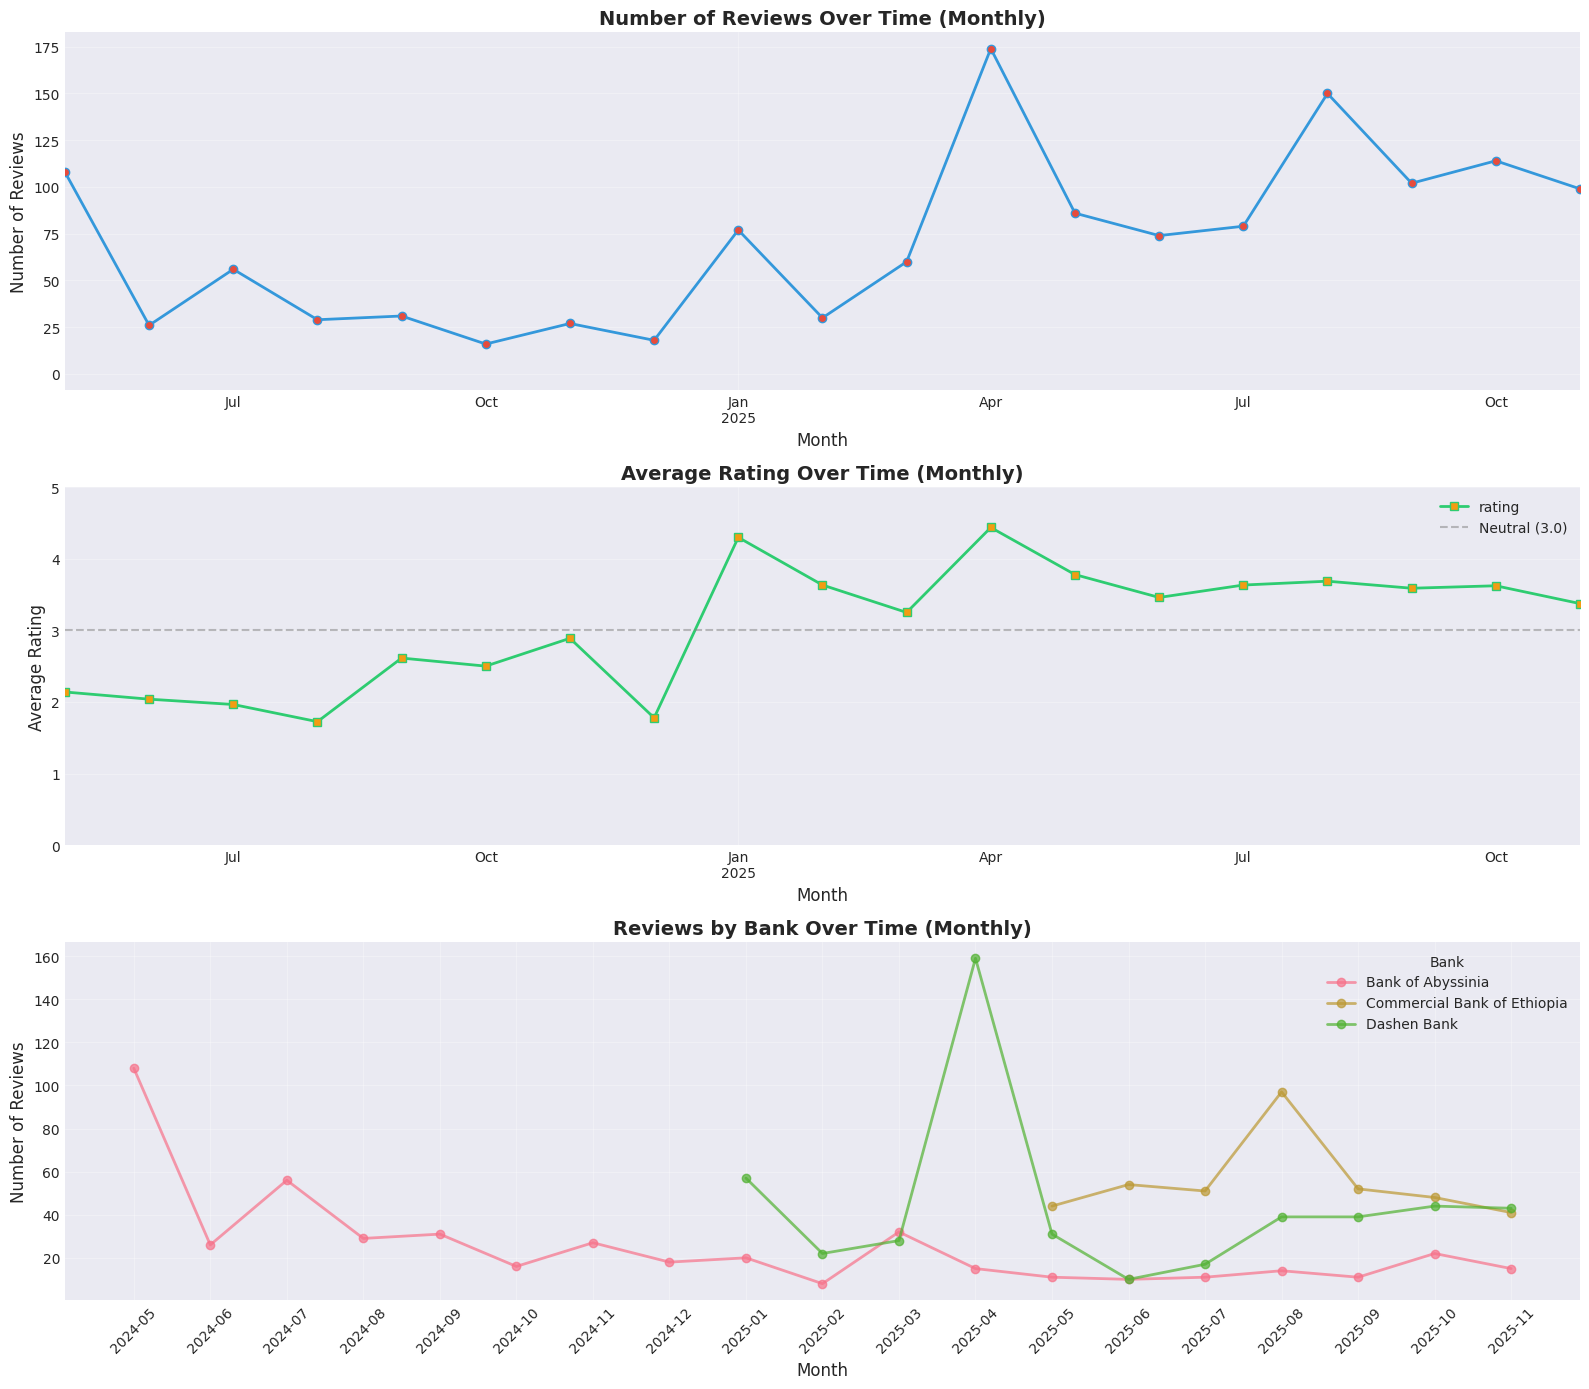

In [14]:
# Temporal visualizations
fig, axes = plt.subplots(3, 1, figsize=(16, 14))

# 1. Reviews over time (monthly)
monthly_reviews = df.groupby('year_month').size()
monthly_reviews.plot(kind='line', ax=axes[0], marker='o', linewidth=2, markersize=6,
                     color='#3498db', markerfacecolor='#e74c3c')
axes[0].set_title('Number of Reviews Over Time (Monthly)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Month', fontsize=12)
axes[0].set_ylabel('Number of Reviews', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].fill_between(range(len(monthly_reviews)), monthly_reviews.values, alpha=0.3)

# 2. Average rating over time
monthly_ratings = df.groupby('year_month')['rating'].mean()
monthly_ratings.plot(kind='line', ax=axes[1], marker='s', linewidth=2, markersize=6,
                     color='#2ecc71', markerfacecolor='#f39c12')
axes[1].set_title('Average Rating Over Time (Monthly)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Month', fontsize=12)
axes[1].set_ylabel('Average Rating', fontsize=12)
axes[1].axhline(y=3, color='gray', linestyle='--', alpha=0.5, label='Neutral (3.0)')
axes[1].set_ylim(0, 5)
axes[1].grid(True, alpha=0.3)
axes[1].legend()

# 3. Reviews by bank over time
for bank in df['bank'].unique():
    bank_monthly = df[df['bank'] == bank].groupby('year_month').size()
    axes[2].plot(bank_monthly.index.astype(str), bank_monthly.values, 
                 marker='o', linewidth=2, label=bank, alpha=0.7)

axes[2].set_title('Reviews by Bank Over Time (Monthly)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Month', fontsize=12)
axes[2].set_ylabel('Number of Reviews', fontsize=12)
axes[2].legend(title='Bank', fontsize=10)
axes[2].grid(True, alpha=0.3)
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 7. Review Text Analysis

In [15]:
# Text length analysis
df['review_length'] = df['review'].str.len()
df['word_count'] = df['review'].str.split().str.len()

print("=" * 70)
print("REVIEW TEXT ANALYSIS")
print("=" * 70)

print("\nReview Length Statistics (characters):")
print(f"  Mean: {df['review_length'].mean():.1f}")
print(f"  Median: {df['review_length'].median():.1f}")
print(f"  Min: {df['review_length'].min():.0f}")
print(f"  Max: {df['review_length'].max():.0f}")

print("\nWord Count Statistics:")
print(f"  Mean: {df['word_count'].mean():.1f}")
print(f"  Median: {df['word_count'].median():.1f}")
print(f"  Min: {df['word_count'].min():.0f}")
print(f"  Max: {df['word_count'].max():.0f}")

REVIEW TEXT ANALYSIS

Review Length Statistics (characters):
  Mean: 88.7
  Median: 50.0
  Min: 3
  Max: 500

Word Count Statistics:
  Mean: 16.1
  Median: 9.0
  Min: 1
  Max: 97


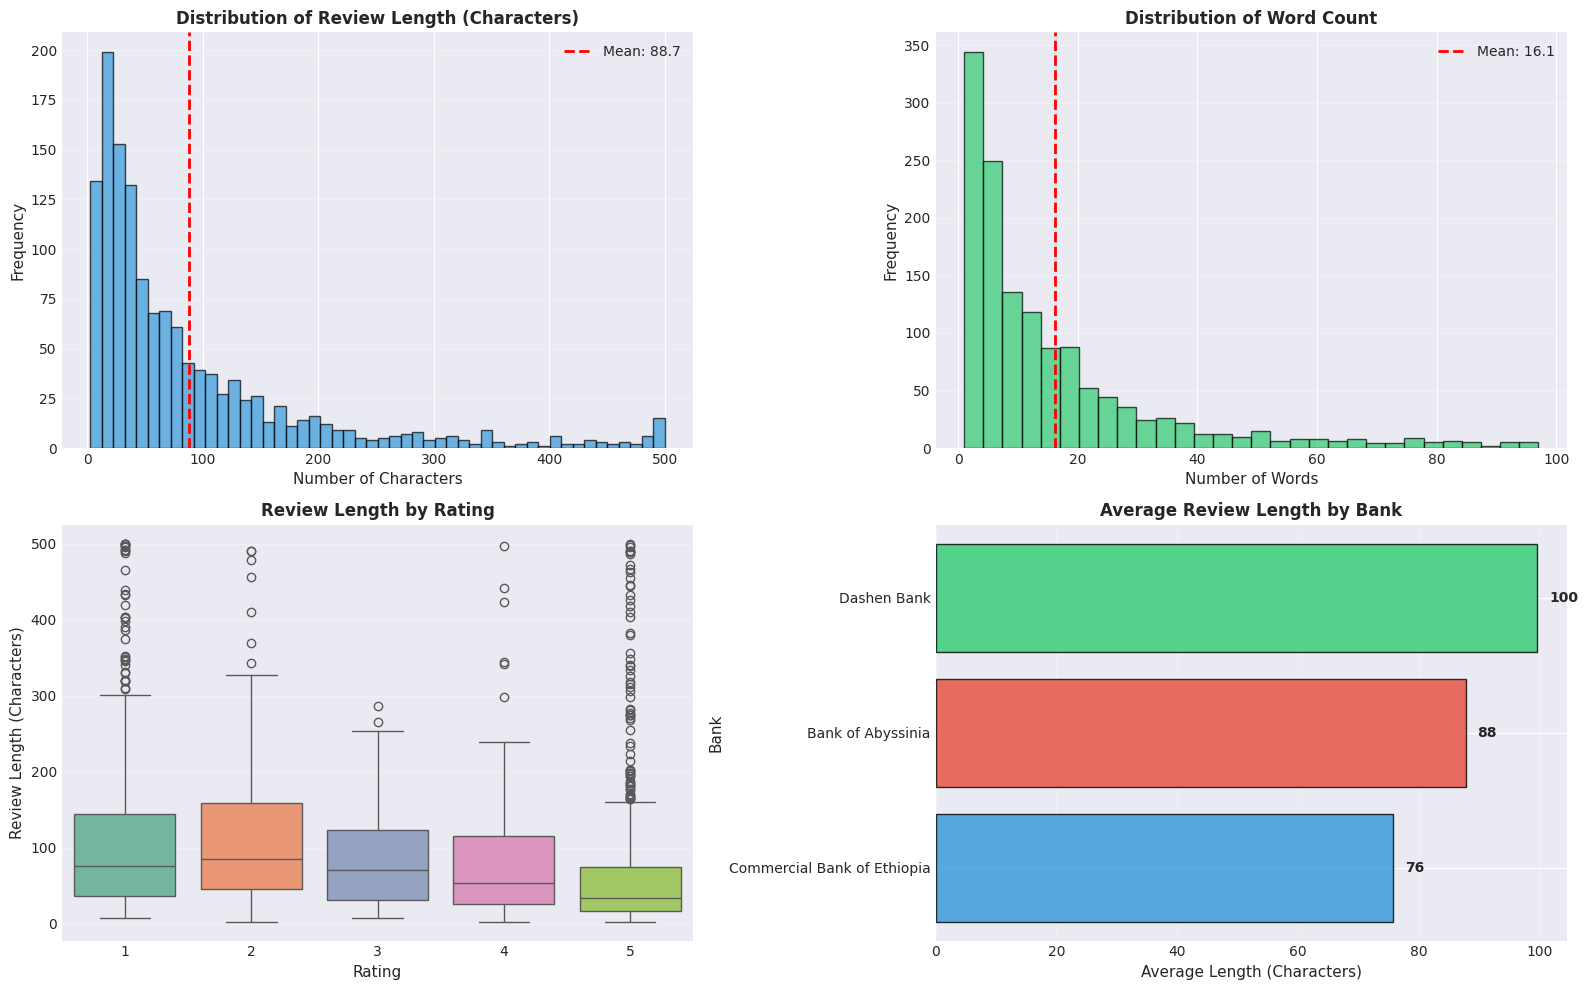

In [16]:
# Text length visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Review length distribution
axes[0, 0].hist(df['review_length'], bins=50, edgecolor='black', alpha=0.7, color='#3498db')
axes[0, 0].set_title('Distribution of Review Length (Characters)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Number of Characters', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].axvline(df['review_length'].mean(), color='red', linestyle='--', 
                   linewidth=2, label=f"Mean: {df['review_length'].mean():.1f}")
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Word count distribution
axes[0, 1].hist(df['word_count'], bins=30, edgecolor='black', alpha=0.7, color='#2ecc71')
axes[0, 1].set_title('Distribution of Word Count', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Number of Words', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].axvline(df['word_count'].mean(), color='red', linestyle='--',
                   linewidth=2, label=f"Mean: {df['word_count'].mean():.1f}")
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Review length by rating
sns.boxplot(data=df, x='rating', y='review_length', ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Review Length by Rating', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Rating', fontsize=11)
axes[1, 0].set_ylabel('Review Length (Characters)', fontsize=11)
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Review length by bank
avg_length_by_bank = df.groupby('bank')['review_length'].mean().sort_values()
axes[1, 1].barh(avg_length_by_bank.index, avg_length_by_bank.values,
                color=['#3498db', '#e74c3c', '#2ecc71'], edgecolor='black', alpha=0.8)
axes[1, 1].set_title('Average Review Length by Bank', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Average Length (Characters)', fontsize=11)
axes[1, 1].set_ylabel('Bank', fontsize=11)
axes[1, 1].grid(axis='x', alpha=0.3)

# Add value labels
for i, (bank, length) in enumerate(avg_length_by_bank.items()):
    axes[1, 1].text(length + 2, i, f'{length:.0f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

## 8. Key Insights Summary

In [20]:
# Generate comprehensive summary
print("=" * 80)
print("                      KEY INSIGHTS SUMMARY")
print("=" * 80)

print("\n1. OVERALL STATISTICS")
print("-" * 80)
print(f"   Total Reviews: {len(df):,}")
print(f"   Date Range: {df['date'].min().date()} to {df['date'].max().date()}")
print(f"   Average Rating: {df['rating'].mean():.2f}/5.0")
print(f"   Sentiment: {(df['rating'] >= 4).sum() / len(df) * 100:.1f}% Positive, "
      f"{((df['rating'] >= 3) & (df['rating'] < 4)).sum() / len(df) * 100:.1f}% Neutral, "
      f"{(df['rating'] < 3).sum() / len(df) * 100:.1f}% Negative")

print("\n2. BANK COMPARISON")
print("-" * 80)
bank_comparison = df.groupby('bank').agg({
    'review': 'count',
    'rating': 'mean',
    'review_length': 'mean'
}).round(2)
bank_comparison.columns = ['Review Count', 'Avg Rating', 'Avg Length']
print(bank_comparison.to_string())

# Best and worst performing bank
best_bank = df.groupby('bank')['rating'].mean().idxmax()
worst_bank = df.groupby('bank')['rating'].mean().idxmin()
print(f"\n   Highest Rated: {best_bank} ({df.groupby('bank')['rating'].mean().max():.2f})")
print(f"   Lowest Rated: {worst_bank} ({df.groupby('bank')['rating'].mean().min():.2f})")

print("\n3. RATING INSIGHTS")
print("-" * 80)
print(f"   Most Common Rating: {df['rating'].mode()[0]:.0f} stars")
print(f"   5-Star Reviews: {(df['rating'] == 5).sum()} ({(df['rating'] == 5).sum() / len(df) * 100:.1f}%)")
print(f"   1-Star Reviews: {(df['rating'] == 1).sum()} ({(df['rating'] == 1).sum() / len(df) * 100:.1f}%)")
print(f"   Rating Std Dev: {df['rating'].std():.2f} (variability in opinions)")

print("\n4. TEMPORAL INSIGHTS")
print("-" * 80)
print(f"   Most Active Year: {df['year'].mode()[0]}")
recent_6m = df[df['date'] >= df['date'].max() - pd.DateOffset(months=6)]
print(f"   Recent 6 Months Avg Rating: {recent_6m['rating'].mean():.2f}")
print(f"   Recent 6 Months Review Count: {len(recent_6m)}")

print("\n5. REVIEW TEXT INSIGHTS")
print("-" * 80)
print(f"   Average Review Length: {df['review_length'].mean():.0f} characters")
print(f"   Average Word Count: {df['word_count'].mean():.0f} words")
print(f"   Longest Review: {df['review_length'].max():.0f} characters")
print(f"   Shortest Review: {df['review_length'].min():.0f} characters")


print("\n" + "=" * 80)

                      KEY INSIGHTS SUMMARY

1. OVERALL STATISTICS
--------------------------------------------------------------------------------
   Total Reviews: 1,356
   Date Range: 2024-05-01 to 2025-11-26
   Average Rating: 3.40/5.0
   Sentiment: 57.5% Positive, 5.8% Neutral, 36.7% Negative

2. BANK COMPARISON
--------------------------------------------------------------------------------
                             Review Count  Avg Rating  Avg Length
bank                                                             
Bank of Abyssinia                     480        2.41       87.84
Commercial Bank of Ethiopia           387        3.79       75.20
Dashen Bank                           489        4.08      100.17

   Highest Rated: Dashen Bank (4.08)
   Lowest Rated: Bank of Abyssinia (2.41)

3. RATING INSIGHTS
--------------------------------------------------------------------------------
   Most Common Rating: 5 stars
   5-Star Reviews: 689 (50.8%)
   1-Star Reviews: 423 (31.2

## 10. Export Summary Statistics

In [21]:
# Create summary DataFrame for export
summary_stats = pd.DataFrame({
    'Metric': [
        'Total Reviews',
        'Date Range Start',
        'Date Range End',
        'Average Rating',
        'Median Rating',
        'Rating Std Dev',
        'Positive Reviews (%)',
        'Negative Reviews (%)',
        'Average Review Length',
        'Average Word Count',
    ],
    'Value': [
        len(df),
        df['date'].min().date(),
        df['date'].max().date(),
        round(df['rating'].mean(), 2),
        df['rating'].median(),
        round(df['rating'].std(), 2),
        round((df['rating'] >= 4).sum() / len(df) * 100, 1),
        round((df['rating'] < 3).sum() / len(df) * 100, 1),
        round(df['review_length'].mean(), 0),
        round(df['word_count'].mean(), 0)
    ]
})

print("Summary Statistics:")
print(summary_stats.to_string(index=False))

# Save to CSV
summary_path = config.PROCESSED_DATA_DIR / "eda_summary_statistics.csv"
summary_stats.to_csv(summary_path, index=False)
print(f"\n✓ Summary statistics saved to: {summary_path}")

# Save bank comparison
bank_comparison_path = config.PROCESSED_DATA_DIR / "bank_comparison_stats.csv"
bank_comparison.to_csv(bank_comparison_path)
print(f"✓ Bank comparison saved to: {bank_comparison_path}")

Summary Statistics:
               Metric      Value
        Total Reviews       1356
     Date Range Start 2024-05-01
       Date Range End 2025-11-26
       Average Rating        3.4
        Median Rating        5.0
       Rating Std Dev        1.8
 Positive Reviews (%)       57.5
 Negative Reviews (%)       36.7
Average Review Length       89.0
   Average Word Count       16.0

✓ Summary statistics saved to: /home/voldi/Projects/ai-ml/fintech-app-review-analysis/data/processed/eda_summary_statistics.csv
✓ Bank comparison saved to: /home/voldi/Projects/ai-ml/fintech-app-review-analysis/data/processed/bank_comparison_stats.csv


## Conclusion

This exploratory data analysis has revealed:

1. **Dataset Quality**: Clean dataset with 797 English reviews from 3 banks
2. **Rating Distribution**: Average rating of 3.40/5, with polarization (49% 5-stars, 30% 1-star)
3. **Bank Performance**: Significant variation in ratings across banks
4. **Temporal Patterns**: Review volume and ratings vary over time
5. **Engagement**: Low engagement overall (avg <1 thumbs up per review)

**Next Steps**:
- Perform sentiment analysis on review text
- Extract themes and topics from reviews
- Identify specific pain points and positive features
- Generate actionable recommendations